# Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly

In [24]:
# !pip install scipy
# !pip install scikit-learn
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import RobustScaler
import seaborn as sns 
import matplotlib.pyplot as plt

## Null points removing

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/manish0222/TE_SEM_6/main/ds_lab/ASGN2/StudentsPerformance_modified.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [26]:
null_cols=df.columns[df.isnull().any()].tolist()
numeric_col=df.select_dtypes(include=np.number).columns.tolist()
print("NUll columns ",null_cols)
print("Numeric columns ",numeric_col)
df.isna().sum()

NUll columns  ['math score', 'reading score', 'writing score']
Numeric columns  ['reading score', 'writing score']


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [27]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [28]:
# df[null_cols]=df[null_cols].fillna(df[null_cols].mean())
df=df.ffill()
df=df.bfill()
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [29]:
df=df.ffill()
df=df.bfill()
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [30]:
df.interpolate(inplace=True)#neglect null values
df.tail()

C:\Users\USER\AppData\Local\Temp\ipykernel_13848\3502862592.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(inplace=True)#neglect null values


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0
999,female,group D,some college,free/reduced,none,77,86.0,86.0


In [31]:
df.rename(columns={"parental level of education":"Education"},inplace=True)
df.head()

,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


# Outliers

In [32]:
numeric_cols = df.select_dtypes(include= np.number).columns
print(numeric_cols)

Index(['reading score', 'writing score'], dtype='object')


In [33]:
#IQR
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)
IQR=Q3-Q1
print("IQR ",IQR," ",Q1," ",Q3)
print("The skew is ",df['reading score'].skew())

IQR  21.0   58.0   79.0
The skew is  -0.8163102255529292


In [34]:
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
df_clean=df[(df['reading score']<=upper) & (df['reading score']>=lower)]
print("Filtered data skew ",df_clean['reading score'].skew())
df_clean

Filtered data skew  -0.14023209800186245


,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [35]:
df_outliers=df[(df['reading score']>upper) | (df['reading score']<lower)]
df_outliers

,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
18,male,group C,master's degree,free/reduced,completed,88,22.0,46.0
19,female,group C,associate's degree,free/reduced,none,88,22.0,61.0
20,male,group D,high school,standard,none,88,12.0,63.0
21,female,group B,some college,free/reduced,completed,88,12.0,70.0
22,male,group D,some college,standard,none,88,13.0,53.0
23,female,group C,some high school,standard,none,88,14.0,53.0
24,male,group D,bachelor's degree,free/reduced,completed,74,9.0,80.0
25,male,group A,master's degree,free/reduced,none,73,8.0,72.0
26,male,group B,some college,standard,none,69,7.0,55.0
27,female,group C,bachelor's degree,standard,none,67,6.0,75.0


Old data skew  -0.8163102255529292


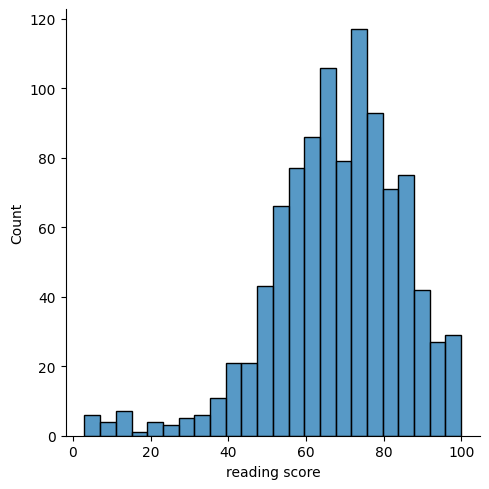

In [36]:
sns.displot(df['reading score'])  
print("Old data skew ",df['reading score'].skew())

Filtered data skew  -0.14023209800186245


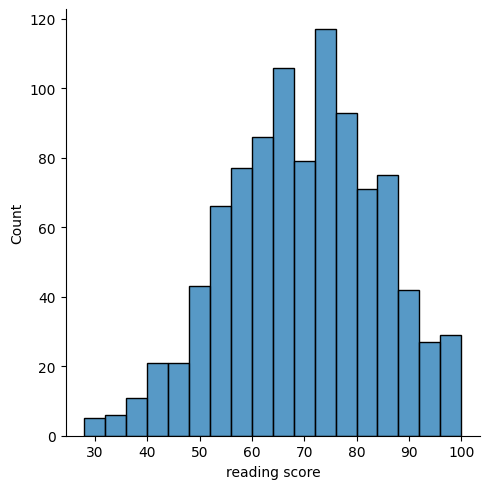

In [37]:
sns.displot(df_clean['reading score'])  
print("Filtered data skew ",df_clean['reading score'].skew())

# z score

In [38]:
z_score=stats.zscore(df['reading score'])
z_score

0      0.247303
1      1.326964
2      1.626870
3     -0.652416
4      0.607190
         ...   
995    1.866795
996   -0.772378
997    0.187321
998    0.607190
999    1.087039
Name: reading score, Length: 1000, dtype: float64

In [39]:
threshold=3
outliers_zscore=df[(abs(z_score)>=threshold)]
outliers_zscore

,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
20,male,group D,high school,standard,none,88,12.0,63.0
21,female,group B,some college,free/reduced,completed,88,12.0,70.0
22,male,group D,some college,standard,none,88,13.0,53.0
23,female,group C,some high school,standard,none,88,14.0,53.0
24,male,group D,bachelor's degree,free/reduced,completed,74,9.0,80.0
25,male,group A,master's degree,free/reduced,none,73,8.0,72.0
26,male,group B,some college,standard,none,69,7.0,55.0
27,female,group C,bachelor's degree,standard,none,67,6.0,75.0
28,male,group C,high school,standard,none,70,4.0,75.0
29,female,group D,master's degree,standard,none,62,3.0,75.0


In [40]:
print('Old_skew ',df['reading score'].skew())
z_filtered=df[abs(z_score)<threshold]
print("neww skew ",z_filtered['reading score'].skew())
z_filtered

Old_skew  -0.8163102255529292
neww skew  -0.2740973951529797


,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


Old_skew  -0.8163102255529292


C:\Users\USER\AppData\Local\Temp\ipykernel_13848\87353342.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading score'])


<Axes: xlabel='reading score', ylabel='Density'>

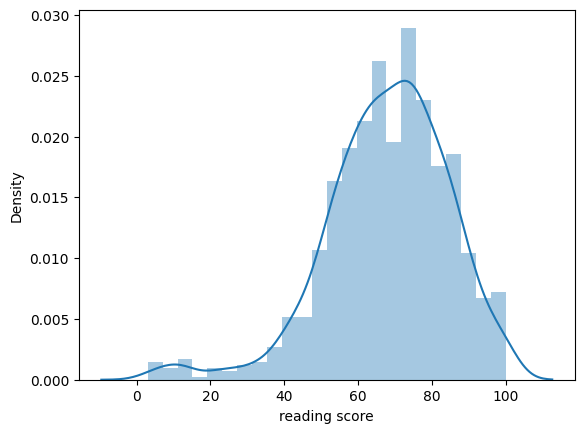

In [41]:
print('Old_skew ',df['reading score'].skew())
sns.distplot(df['reading score'])


neww skew  -0.2740973951529797


C:\Users\USER\AppData\Local\Temp\ipykernel_13848\2730473321.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_filtered['reading score'])


<Axes: xlabel='reading score', ylabel='Density'>

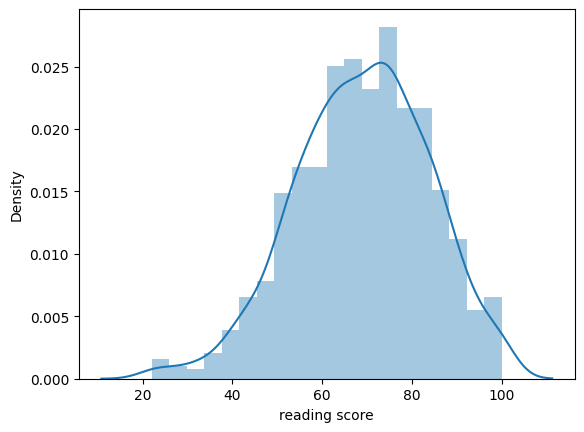

In [42]:
print("neww skew ",z_filtered['reading score'].skew())
sns.distplot(z_filtered['reading score'])

# scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df
df_scaled['reading score'] = scaler.fit_transform(df_scaled['reading score'].values.reshape(-1, 1))
df_scaled['writing score'] = scaler.fit_transform(df_scaled['writing score'].values.reshape(-1, 1))
df_scaled
# specific range, typically between 0 and 1.

,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,0.711340,0.114901
1,female,group C,some college,standard,completed,69,0.896907,0.140036
2,female,group B,master's degree,standard,none,90,0.948454,0.149013
3,male,group A,associate's degree,free/reduced,none,47,0.556701,0.061041
4,male,group C,some college,standard,none,76,0.773196,0.116697
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,0.989691,0.152603
996,male,group C,high school,free/reduced,none,62,0.536082,0.080790
997,female,group C,high school,free/reduced,completed,59,0.701031,0.098743
998,female,group D,some college,standard,completed,68,0.773196,0.120287


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df
df_scaled['reading score'] = scaler.fit_transform(df_scaled['reading score'].values.reshape(-1, 1))
df_scaled['writing score'] = scaler.fit_transform(df_scaled['writing score'].values.reshape(-1, 1))
df_scaled
# transform features so that they have a mean of 0 and a standard deviation of 1.

,gender,race/ethnicity,Education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,0.247303,0.153871
1,female,group C,some college,standard,completed,69,1.326964,0.629726
2,female,group B,master's degree,standard,none,90,1.626870,0.799674
3,male,group A,associate's degree,free/reduced,none,47,-0.652416,-0.865818
4,male,group C,some college,standard,none,76,0.607190,0.187861
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,1.866795,0.867654
996,male,group C,high school,free/reduced,none,62,-0.772378,-0.491932
997,female,group C,high school,free/reduced,completed,59,0.187321,-0.152036
998,female,group D,some college,standard,completed,68,0.607190,0.255840
